In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [8]:
df = sns.load_dataset('flights')

In [9]:
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<ipython-input-12-c9167ffc7d19>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['passengers'], kde=True , bins=30)


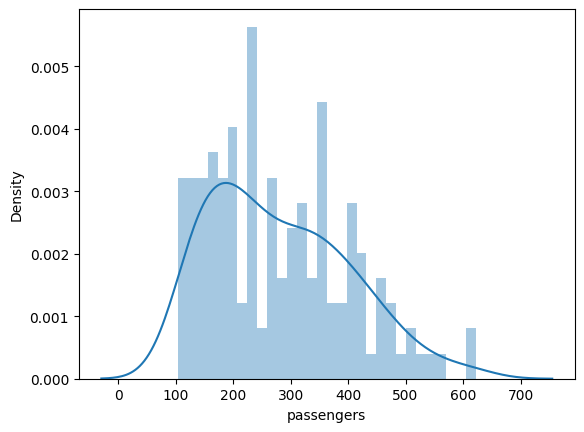

In [12]:
sns.distplot(df['passengers'], kde=True , bins=30)
plt.show()

<Axes: xlabel='passengers', ylabel='Count'>

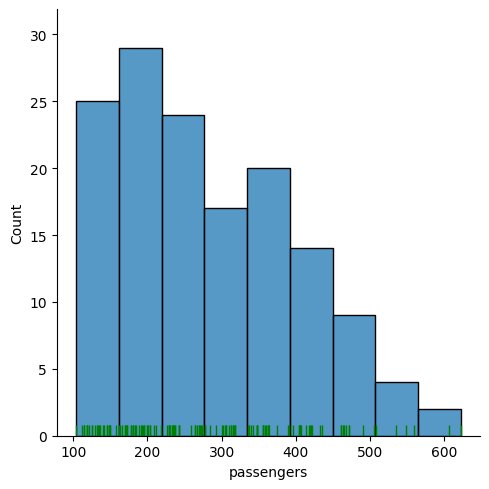

In [16]:
sns.displot(df['passengers'])
sns.rugplot(df['passengers'],color='green')

In [17]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [20]:
df.groupby('passengers') ['month'].value_counts()

passengers  month
104         Nov      1
            Jan      0
            Feb      0
            Mar      0
            Apr      0
                    ..
622         Aug      0
            Sep      0
            Oct      0
            Nov      0
            Dec      0
Name: month, Length: 1416, dtype: int64

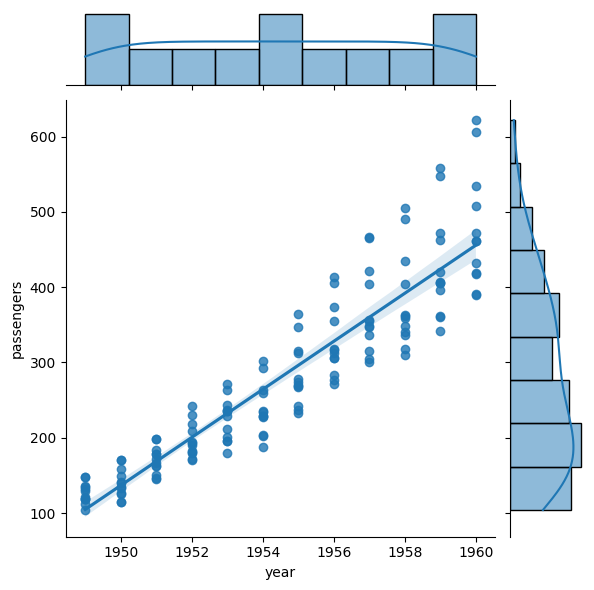

In [23]:
sns.jointplot(x=df['year'], y=df['passengers'], data=df ,kind='reg')
plt.show()

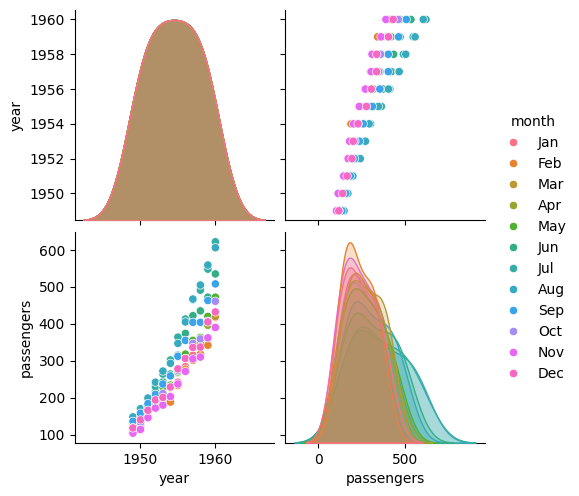

In [27]:
sns.pairplot(data=df , hue='month')
plt.show()

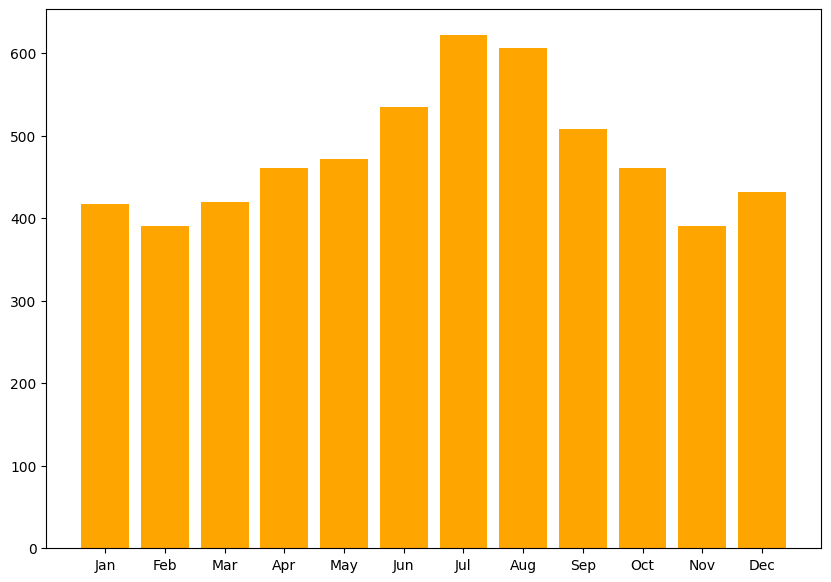

In [32]:
plt.figure(figsize=(10,7))
plt.bar(df.month , df.passengers, color='orange')
plt.show()

In [33]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: ylabel='Density'>

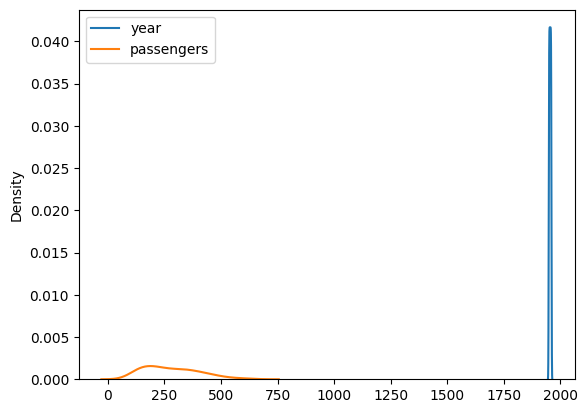

In [36]:
sns.kdeplot(data=df)

In [38]:
df.dropna()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [52]:
df = sns.load_dataset('flights')

In [53]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [54]:
df.drop(columns=['month'], inplace=True)

In [55]:
df

,year,passengers
0,1949,112
1,1949,118
2,1949,132
3,1949,129
4,1949,121
...,...,...
139,1960,606
140,1960,508
141,1960,461
142,1960,390


In [57]:
x = df.drop(columns='year')

In [58]:
x

,passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [59]:
y = df['year']

In [60]:
y

0      1949
1      1949
2      1949
3      1949
4      1949
       ... 
139    1960
140    1960
141    1960
142    1960
143    1960
Name: year, Length: 144, dtype: int64

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lin_model = LinearRegression()

In [63]:
lin_model.fit(x ,y)

LinearRegression()

In [96]:
lin_model.predict(x)

array([1950.02018827, 1950.17989767, 1950.55255294, 1950.47269824,
       1950.25975237, 1950.63240764, 1950.97844468, 1950.97844468,
       1950.65902588, 1950.20651591, 1949.8072424 , 1950.17989767,
       1950.10004297, 1950.39284354, 1950.79211704, 1950.63240764,
       1950.36622531, 1951.00506291, 1951.56404581, 1951.56404581,
       1951.24462701, 1950.57917117, 1950.07342474, 1950.76549881,
       1950.89858998, 1951.03168114, 1951.77699168, 1951.37771818,
       1951.61728228, 1951.77699168, 1952.33597459, 1952.33597459,
       1951.93670108, 1951.35109995, 1950.92520821, 1951.45757288,
       1951.59066405, 1951.83022815, 1952.17626519, 1951.85684638,
       1951.91008285, 1952.84172102, 1953.16113982, 1953.48055863,
       1952.60215692, 1952.12302872, 1951.61728228, 1952.20288342,
       1952.25611989, 1952.25611989, 1953.32084923, 1953.29423099,
       1953.13452159, 1953.50717686, 1954.06615976, 1954.27910563,
       1953.34746746, 1952.65539339, 1951.83022815, 1952.38921

In [99]:
lin_model.predict([[100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1949.70076947])

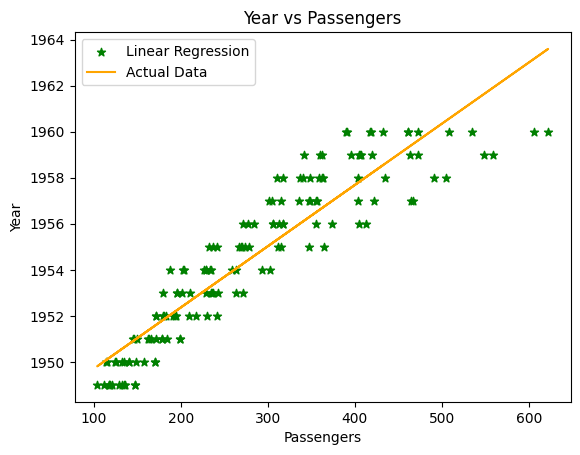

In [88]:
plt.scatter(x=df['passengers'], y=df['year'], color='green', marker='*')
plt.plot(df['passengers'], lin_model.predict(df[['passengers']]), color='orange')
plt.xlabel('Passengers')
plt.ylabel('Year')
plt.title('Year vs Passengers')
plt.legend(['Linear Regression', 'Actual Data'])
plt.show()
